In [1]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import re

In [2]:
df = pd.read_csv("C:/Users/dadadah_ye/Downloads/total_data_11_27.csv", encoding = 'utf-8-sig')
df = df.dropna()
df['score'].value_counts()

1    82598
0    10218
Name: score, dtype: int64

In [3]:
# Solve data imbalanced
def under_sampling(df, target_label):
    rus  = RandomUnderSampler(return_indices=True)
    X_tl, y_tl, id_tl = rus.fit_sample(df, df[target_label])

    # remake data frame.
    columns = df.columns
    df = pd.DataFrame(X_tl, columns=columns)
    # df = df.astype(float)

    return df

df = under_sampling(df, "score")
df['score'].value_counts()

1    10218
0    10218
Name: score, dtype: int64

In [4]:
# remove emoji
def emoji(df):
    EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return EMOJI.sub(r'', df)

df['review'] = df['review'].apply(emoji)

# replace \n
def replaceText(df):
    text = df.replace("\n",".")
    return text

df['review'] = df['review'].apply(replaceText)

# regular expression
def cleanText(df):
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', df)
    return text

df['review'] = df['review'].apply(cleanText)

In [5]:
from konlpy.tag import Hannanum
from sklearn.model_selection import train_test_split

hannanum = Hannanum()
train, test = train_test_split(df, test_size=0.2)

train_x = []
train_y = []
test_x = []
test_y = []

for i, row in train.iterrows():
    train_x.append(['/'.join(token) for token in hannanum.pos(row[0])])
    train_y.append(row[1])
    
for i, row in test.iterrows():
    test_x.append(['/'.join(token) for token in hannanum.pos(row[0])])
    test_y.append(row[1])

C:\Users\dadadah_ye\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [6]:
train_x[0:10]

[['브런치/N', '짱짱양이많아서/N', '항상먹고/N', '남은거/N', '포장/N', '하/X', 'ㅁ/E', 'bb/F'],
 ['희/P',
  'ㄴ/E',
  '국물/N',
  '의/J',
  '닭백숙/N',
  '라멘/N',
  '이/J',
  '라/E',
  '고/J',
  '익히/M',
  '들/P',
  'ㄴ/E',
  '오레노라멘/N',
  '가/P',
  '고/E',
  '싶/P',
  '다/E',
  '누르/P',
  'ㄴ/E',
  '지/N',
  '얼마만/N',
  '에/J',
  '가/P',
  '게/E',
  '되/P',
  'ㄴ/E',
  '것/N',
  '이/J',
  'ㄴ지/E',
  'ㅠ/N',
  '자판기/N',
  '에서/J',
  '베스트메뉴/N',
  '토리파이탄/N',
  '에/J',
  '반숙추/N',
  '가/J',
  '차슈추가/N',
  '로/J',
  '주문함가게/N',
  '가/J',
  '좁/P',
  '고/E',
  '웨이팅/N',
  '이/J',
  '많/P',
  '아/E',
  '금방/M',
  '먹/P',
  '고/E',
  '나오/P',
  '아/E',
  '하/P',
  'ㄴ데/E',
  '그래서/M',
  '그러/P',
  'ㄴ지/E',
  '라멘/N',
  '도/J',
  '속전속결/N',
  '로/J',
  '나옴닭육수/N',
  '의/J',
  '개운/N',
  '하/X',
  'ㅁ/E',
  '보/P',
  '다는/E',
  '진/N',
  '하고/J',
  '묵직/N',
  '하/X',
  'ㄴ/E',
  '국물/N',
  '에/J',
  '가깝/P',
  '었고/E',
  '전체적/N',
  '으로/J',
  '짰다ㅜㅜ/N',
  '라멘/N',
  '이/J',
  '원래/M',
  '짜/P',
  'ㄴ/E',
  '음식이긴/N',
  '한데이치/N',
  '란도/J',
  '짜/P',
  '고/E',
  '부탄츄/N',
  '도/J',
  '짜/P',
  'ㄴ데/E',
  '이날

In [7]:
tokens = [d for token in train_x for d in token]
tokens[0:10]

['브런치/N',
 '짱짱양이많아서/N',
 '항상먹고/N',
 '남은거/N',
 '포장/N',
 '하/X',
 'ㅁ/E',
 'bb/F',
 '희/P',
 'ㄴ/E']

In [40]:
import nltk

text = nltk.Text(tokens, name='NMSC')
print(len(text))

1080349


In [70]:
text_josa = list(text)

list_num = []
for i in range(0,len(text_josa)):
    if "/J" in text_josa[i]:
        list_num.append(i)

for index in sorted(list_num, reverse=True):
    del text_josa[index]
    
print(len(text_josa))

864738


In [74]:
type(text_josa)

text_josa = nltk.text.Text(text_josa)

### visualization most 50 words.

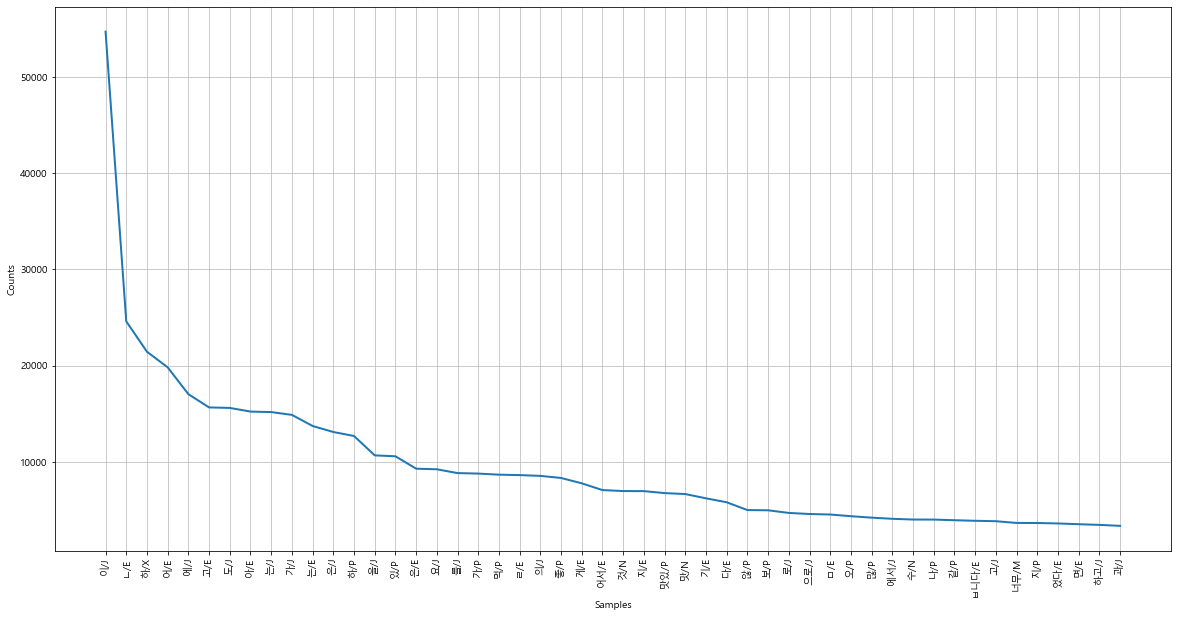

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

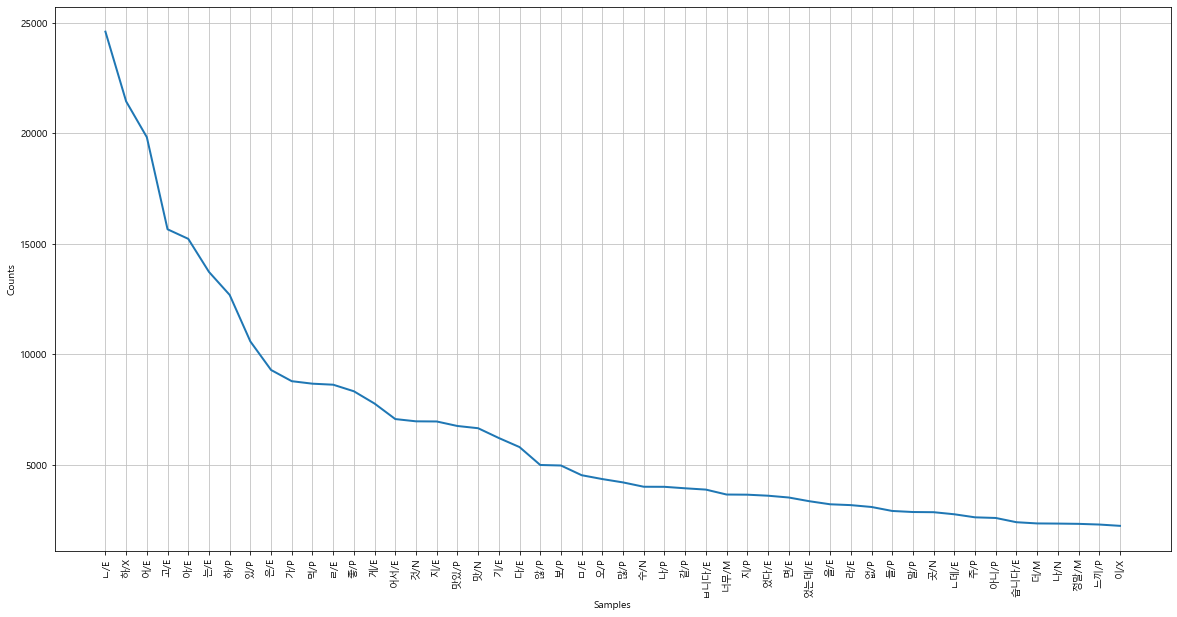

In [75]:
font_name_josa = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name_josa)

plt.figure(figsize=(20,10))
text_josa.plot(50)

In [10]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]
selected_words[0:10]

['이/J', 'ㄴ/E', '하/X', '어/E', '에/J', '고/E', '도/J', '아/E', '는/J', '가/J']

In [76]:
selected_words_josa = [f[0] for f in text_josa.vocab().most_common(10000)]
selected_words_josa[0:10]

['ㄴ/E', '하/X', '어/E', '고/E', '아/E', '는/E', '하/P', '있/P', '은/E', '가/P']

In [11]:
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d in train_x]
test_x = [term_frequency(d) for d in test_x]
train_y = [c for c in train_y]
test_y = [c for c in test_y]

In [ ]:
def term_frequency_josa(doc):
    return [doc.count(word) for word in selected_words_josa]

train_x_josa = [term_frequency_josa(d) for d in train_x]
test_x_josa = [term_frequency_josa(d) for d in test_x]

In [12]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')
y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [ ]:
x_train_josa = np.asarray(train_x_josa).astype('float32')
x_test_josa = np.asarray(test_x_josa).astype('float32')

### modeling

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

naivebayes = MultinomialNB()
naivebayes.fit(x_train_josa, y_train)

'''for i in np.arange(0, 1.01, 0.05):
    threshold = i
    predicated_proba = naivebayes.predict_proba(x_test)
    predicted = (predicated_proba[:,1] >= i).astype('int')
    
    accuracy = accuracy_score(y_test, predicted)
    print('threshold = {}, accuracy = {}'.format(i, accuracy))'''

print('Navie Bayes accuracy = {}'.format(naivebayes.score(x_test_josa,y_test)))

Navie Bayes accuracy = 0.7282289628180039


In [ ]:
naivebayes.fit(x_train_josa, y_train)
print('Navie Bayes accuracy = {}'.format(naivebayes.score(x_test_josa,y_test)))

### ROC curve

In [20]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = naivebayes.predict(x_test).ravel()
#y_pred = (predicated_proba[:,1] >= 0.7).astype('int')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_curve = auc(fpr, tpr)
auc_curve

0.7282787273703833

In [ ]:
y_pred_josa = naivebayes.predict(x_test_josa).ravel()

fpr_josa, tpr_josa, thresholds_josa = roc_curve(y_test, y_pred_josa)
auc_curve_josa = auc(fpr_josa, tpr_josa)
auc_curve_josa

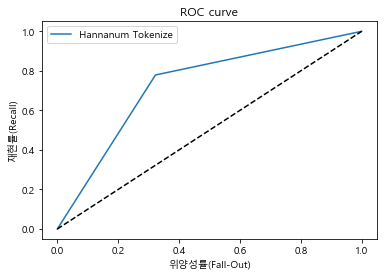

In [21]:
plt.plot(fpr, tpr, label='Hannanum Tokenize')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC curve')
plt.show()

In [ ]:
plt.plot(fpr_josa, tpr_josa, label='Hannanum Tokenize: remove josa')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC curve')
plt.show()

### Confusion Matrix

In [22]:
print(confusion_matrix(y_test, y_pred))
print('Recall = {}'.format(recall_score(y_test, y_pred)))

[[1386  660]
 [ 451 1591]]
Recall = 0.7791380999020568


In [ ]:
print(confusion_matrix(y_test, y_pred_josa))
print('Recall = {}'.format(recall_score(y_test, y_pred_josa)))

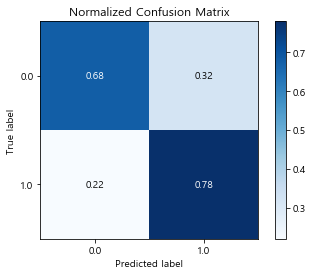

In [23]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_josa, normalize=True)

### F1 Score

In [24]:
print('F1 - Score = {}'.format(f1_score(y_test, y_pred)))

F1 - Score = 0.741206615420452


In [ ]:
print('F1 - Score = {}'.format(f1_score(y_test, y_pred_josa)))